In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
from matplotlib.ticker import ScalarFormatter
import numpy as np
import datetime

In [2]:
filename=(datetime.datetime.now()-datetime.timedelta(days=1)).strftime("Case data/covid19_case_summary_%Y-%m-%d.csv")

df = pd.read_csv(filename)                                          #Load CSV
df=df.pivot_table(index=['attribute','metric'],columns='description',values='value')  #Reshape the data

#Create a new df with only the data I want
df1=pd.DataFrame(data=df['Cases of COVID-19 in Colorado by Date Reported to the State'].dropna()
                 .xs('Cases', axis=0, level=1, drop_level=True))
df2=pd.DataFrame(data=df['Cases of COVID-19 in Colorado by Date of Illness Onset'].dropna()
                 .xs('Cases', axis=0, level=1, drop_level=True))
df3=pd.DataFrame(data=df['Cumulative Number of Hospitalized Cases of COVID-19 in Colorado by Date Reported to the State'].dropna()
                 .xs('Cases', axis=0, level=1, drop_level=True))
df4=pd.DataFrame(data=df['Number of Deaths From COVID-19 in Colorado by Date of Death - By Day'].dropna()
                 .xs('Deaths', axis=0, level=1, drop_level=True))
df5=pd.DataFrame(data=df['Cumulative Number of Hospitalized Cases of COVID-19 in Colorado by Date of Illness Onset'].dropna()
                 .xs('Cases', axis=0, level=1, drop_level=True))
df6=pd.DataFrame(data=df['Cumulative Number of Deaths From COVID-19 in Colorado by Date of Illness'].dropna()
                 .xs('Cases', axis=0, level=1, drop_level=True))
COVID=pd.concat([df1,df2,df3,df4,df5,df6], axis=1).rename(columns={"Cases of COVID-19 in Colorado by Date Reported to the State": "Cases Reported", 
                         "Cases of COVID-19 in Colorado by Date of Illness Onset": "Cases by Onset",
                         "Cumulative Number of Hospitalized Cases of COVID-19 in Colorado by Date Reported to the State":"Total Hosp",
                         "Number of Deaths From COVID-19 in Colorado by Date of Death - By Day": "Deaths by Date of Death",
                         "Cumulative Number of Hospitalized Cases of COVID-19 in Colorado by Date of Illness Onset":"Hosp by Onset",
                         "Cumulative Number of Deaths From COVID-19 in Colorado by Date of Illness":"Deaths by Onset",})
COVID["Percent Positve"]=pd.DataFrame(data=df['Positivity Data from Clinical Laboratories'].dropna()
                 .xs('Percent Positivity', axis=0, level=1, drop_level=True))['Positivity Data from Clinical Laboratories']
COVID["Total Tests"]=pd.DataFrame(data=df['Positivity Data from Clinical Laboratories'].dropna()
                 .xs('Count of people tested by CDPHE lab', axis=0, level=1, drop_level=True))['Positivity Data from Clinical Laboratories']+pd.DataFrame(data=df['Positivity Data from Clinical Laboratories'].dropna()
                 .xs('Count of people tested by non-CDPHE (commercial) lab', axis=0, level=1, drop_level=True))['Positivity Data from Clinical Laboratories']

#Sort Index by date
COVID.index = pd.to_datetime(COVID.index)
COVID=COVID.sort_index()



#Calculate New Columns
COVID['7DayTests'] = COVID['Total Tests'].iloc[:].rolling(window=7).mean()
COVID['7DayPPos']=COVID['Percent Positve'].iloc[:].rolling(window=7).mean()

COVID['7DayReport'] = COVID['Cases Reported'].iloc[:].rolling(window=7).mean()                               #Calculate 7 day avg of new cases
COVID['change in 7 day reported']=(COVID['7DayReport']-COVID['7DayReport'].shift(7))/COVID['7DayReport'].shift(7)*100
COVID['dHosp'] = COVID['Total Hosp']-COVID['Total Hosp'].shift(1)
COVID['7DayHosp'] = COVID['dHosp'].iloc[:].rolling(window=7).mean()
COVID['change in 7 day Hosp']=(COVID['7DayHosp']-COVID['7DayHosp'].shift(7))/COVID['7DayHosp'].shift(7)*100
COVID['7DayDeaths'] = COVID['Deaths by Date of Death'].iloc[:].rolling(window=7).mean()
COVID['change in 7 day Deaths']=(COVID['7DayDeaths']-COVID['7DayDeaths'].shift(7))/COVID['7DayDeaths'].shift(7)*100

#By onset
COVID['7DayOnset'] = COVID['Cases by Onset'].iloc[:].rolling(window=7).mean()  
COVID['change in 7 day onset']=(COVID['7DayOnset']-COVID['7DayOnset'].shift(7))/COVID['7DayOnset'].shift(7)*100
COVID['dHospOnset'] = COVID['Hosp by Onset']-COVID['Hosp by Onset'].shift(1)
COVID['7DayHospOnset'] = COVID['dHospOnset'].iloc[:].rolling(window=7).mean()
COVID['change in 7 day Hosp Onset']=(COVID['7DayHospOnset']-COVID['7DayHospOnset'].shift(7))/COVID['7DayHospOnset'].shift(7)*100

COVID['dDeathsOnset'] = COVID['Deaths by Onset']-COVID['Deaths by Onset'].shift(1)
COVID['7DayDeathsOnset'] = COVID['dDeathsOnset'].iloc[:].rolling(window=7).mean()
COVID['change in 7 day Deaths Onset']=(COVID['7DayDeathsOnset']-COVID['7DayDeathsOnset'].shift(7))/COVID['7DayDeathsOnset'].shift(7)*100

COVID.tail(20)


,Cases Reported,Cases by Onset,Total Hosp,Deaths by Date of Death,Hosp by Onset,Deaths by Onset,Percent Positve,Total Tests,7DayTests,7DayPPos,...,7DayDeaths,change in 7 day Deaths,7DayOnset,change in 7 day onset,dHospOnset,7DayHospOnset,change in 7 day Hosp Onset,dDeathsOnset,7DayDeathsOnset,change in 7 day Deaths Onset
2020-06-21,140.0,249.0,5582.0,3.0,5660.0,1707.0,2.23,6264.0,6336.714286,3.044286,...,4.142857,-46.296296,252.285714,42.880259,10.0,13.142857,5.747126,2.0,1.571429,-31.250000
2020-06-22,183.0,356.0,5599.0,2.0,5679.0,1711.0,4.06,4114.0,6284.285714,3.248571,...,4.000000,-37.777778,256.285714,27.868852,19.0,12.714286,-7.291667,4.0,1.857143,-18.750000
2020-06-23,257.0,263.0,5614.0,2.0,5686.0,1712.0,3.54,6296.0,6207.857143,3.294286,...,3.714286,-38.095238,258.000000,23.783413,7.0,11.285714,-21.000000,1.0,1.714286,-29.411765
2020-06-24,258.0,323.0,5626.0,2.0,5699.0,1713.0,3.00,8295.0,6462.714286,3.242857,...,3.428571,-33.333333,268.142857,20.629820,13.0,10.714286,-31.192661,1.0,1.714286,-20.000000
2020-06-25,318.0,371.0,5640.0,2.0,5715.0,1715.0,3.85,7254.0,6413.142857,3.221429,...,3.142857,-38.888889,290.428571,27.380952,16.0,11.714286,-24.074074,2.0,1.714286,-7.692308
2020-06-26,285.0,258.0,5657.0,4.0,5736.0,1717.0,3.03,8525.0,6628.285714,3.318571,...,3.000000,-32.258065,301.142857,33.164877,21.0,13.571429,-8.653846,2.0,1.857143,0.000000
2020-06-27,285.0,258.0,5666.0,4.0,5749.0,1718.0,3.55,7690.0,6919.714286,3.322857,...,2.714286,-42.424242,296.857143,22.235294,13.0,14.142857,0.000000,1.0,1.857143,18.181818
2020-06-28,164.0,209.0,5680.0,3.0,5766.0,1720.0,2.97,5479.0,6807.571429,3.428571,...,2.714286,-34.482759,291.142857,15.402039,17.0,15.142857,15.217391,2.0,1.857143,18.181818
2020-06-29,217.0,347.0,5701.0,3.0,5776.0,1721.0,3.50,5805.0,7049.142857,3.348571,...,2.857143,-28.571429,289.857143,13.099220,10.0,13.857143,8.988764,1.0,1.428571,-23.076923
2020-06-30,287.0,299.0,5714.0,0.0,5793.0,1721.0,3.97,7022.0,7152.857143,3.410000,...,2.571429,-30.769231,295.000000,14.341085,17.0,15.285714,35.443038,0.0,1.285714,-25.000000


C:\Users\Soltys\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\Soltys\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\Soltys\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\Soltys\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\Soltys\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\Soltys\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


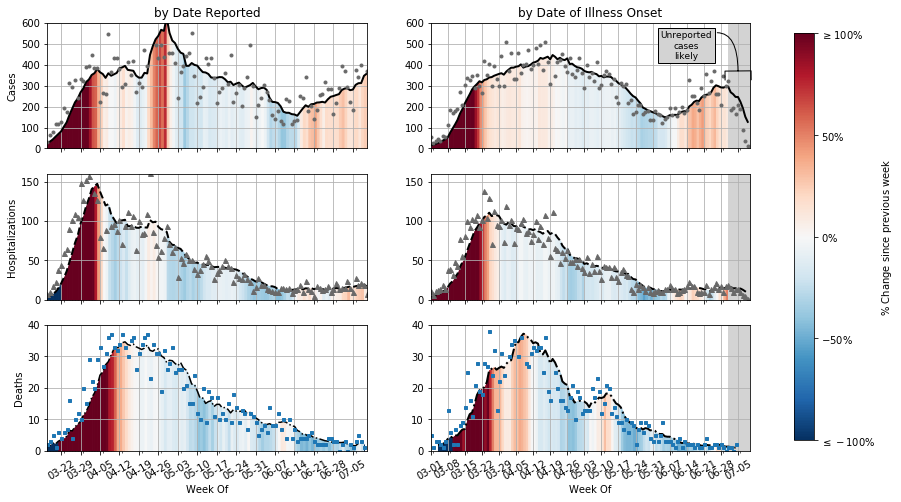

In [3]:
plt.rcParams['figure.figsize'] = [40/2.54, 20/2.54]
fig, axs = plt.subplots(nrows=3, ncols=2,facecolor='white')
dates=COVID.reset_index()['index'].values
cmap = mpl.cm.RdBu.reversed()
normalize = mpl.colors.Normalize(vmin=-100, vmax=100)
N=len(COVID)
formatter = mdates.DateFormatter("%m-%d")
locator=mdates.WeekdayLocator(byweekday=WE)

######## By Date Reported ###########
## Cases ##
#Plot 7-day avg line
COVID.plot(y="7DayReport",linewidth=2,label='7 day avg',color='k',ax=axs[0][0])
#Fill with colors by slope
for i in range(0,N):
    axs[0][0].fill_between(x=dates[i-1:i+1],y1=COVID["7DayReport"][i-1:i+1],y2=0, color=cmap(normalize(COVID["change in 7 day reported"][i])))
#Plot daily points
COVID.plot(y="Cases Reported",label="Cases Reported",style='.',ax=axs[0][0],color='dimgrey')

## Hosp##
COVID.plot(y='7DayHosp',ax=axs[1][0],style='--',color='k',linewidth=2)
for i in range(0,N):
    axs[1][0].fill_between(x=dates[i-1:i+1],y1=COVID["7DayHosp"][i-1:i+1],y2=0, color=cmap(normalize(COVID["change in 7 day Hosp"][i])))
COVID.plot(y='dHosp',ax=axs[1][0],style='^',color='dimgrey',markersize='5')

## Deaths ##
COVID.plot(y='7DayDeaths',ax=axs[2][0],style='-.',color='black')
for i in range(0,N):
    axs[2][0].fill_between(x=dates[i-1:i+1],y1=COVID["7DayDeaths"][i-1:i+1],y2=0, color=cmap(normalize(COVID["change in 7 day Deaths"][i])))
COVID.plot(y='Deaths by Date of Death',ax=axs[2][0],style='s',markersize='3')


for i in range (0,3):
    axs[i][0].set_xlim([datetime.date(2020, 3, 1), dates[N-1]])
    axs[i][0].get_legend().remove()
    axs[i][0].xaxis.set_major_formatter(formatter)
    axs[i][0].xaxis.set_major_locator(locator)
    axs[i][0].tick_params(axis='x', labelrotation=30)
    axs[i][0].grid()

axs[0][0].title.set_text('by Date Reported')
axs[0][0].set(xlabel='',ylabel='Cases',xlim=[datetime.date(2020, 3, 17), dates[N-1]],ylim=(0, 600),xticklabels='')
axs[1][0].set(xlabel='',ylabel='Hospitalizations',xlim=[datetime.date(2020, 3, 17), dates[N-1]],ylim=(0, 160),xticklabels='')
axs[2][0].set(xlabel='Week Of',ylabel='Deaths',xlim=[datetime.date(2020, 3, 17), dates[N-1]],ylim=(0, 40))
    
###### Plots by onset date
COVID.plot(y="7DayOnset",linewidth=2,label='7 day avg',color='k',ax=axs[0][1])

for i in range(0,N):
    axs[0][1].fill_between(x=dates[i-1:i+1],y1=COVID["7DayOnset"][i-1:i+1],y2=0, color=cmap(normalize(COVID["change in 7 day onset"][i])))
COVID.plot(y="Cases by Onset",label="Cases Reported",style='.',ax=axs[0][1],color='dimgrey')

COVID.plot(y='7DayHospOnset',ax=axs[1][1],style='--',color='k',linewidth=2)
for i in range(0,N):
    axs[1][1].fill_between(x=dates[i-1:i+1],y1=COVID["7DayHospOnset"][i-1:i+1],y2=0, color=cmap(normalize(COVID["change in 7 day Hosp Onset"][i])))
COVID.plot(y='dHospOnset',ax=axs[1][1],style='^',markersize='5',color='dimgrey')

COVID.plot(y='7DayDeathsOnset',ax=axs[2][1],style='-.',color='k',linewidth=2)
for i in range(0,N):
    axs[2][1].fill_between(x=dates[i-1:i+1],y1=COVID["7DayDeathsOnset"][i-1:i+1],y2=0, color=cmap(normalize(COVID["change in 7 day Deaths Onset"][i])))
COVID.plot(y='dDeathsOnset',ax=axs[2][1],style='s',markersize='3')

for i in range(0,3):
    axs[i][1].fill_between(x=dates[N-10:N],y1=600,y2=0, color="lightgray")


sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalize)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axs[:][:].ravel().tolist(), shrink=0.95)
cbar.set_ticks(np.arange(-100, 101,50))
cbar.set_ticklabels(['$\leq -100\%$', '$-50\%$', '$0\%$', '$50\%$','$\geq 100\%$'])
cbar.set_label('$\%$ Change since previous week')

for i in range (0,3):
    axs[i][1].set_xlim([datetime.date(2020, 3, 1), dates[N-1]])
    axs[i][1].get_legend().remove()
    axs[i][1].xaxis.set_major_formatter(formatter)
    axs[i][1].xaxis.set_major_locator(locator)
    axs[i][1].tick_params(axis='x', labelrotation=30)
    axs[i][1].grid()

axs[0][1].title.set_text('by Date of Illness Onset')
axs[0][1].set(xlabel='',ylabel='', ylim=(0, 600),xticklabels='')
axs[1][1].set(xlabel='',ylabel='', ylim=(0, 160),xticklabels='')
axs[2][1].set(xlabel='Week Of',ylabel='',ylim=(0, 40))

axs[0][1].annotate('Unreported\ncases\nlikely', xy=(0.962, 0.60), xytext=(0.8, .70), xycoords='axes fraction', 
            fontsize=9, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='lightgray'),
            arrowprops=dict(arrowstyle='-[, widthB=1.45, lengthB=1', lw=1.0,
                  connectionstyle="arc3,rad=-0.95"))
plt.show()

C:\Users\Soltys\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\Soltys\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\Soltys\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\Soltys\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\Soltys\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\Soltys\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


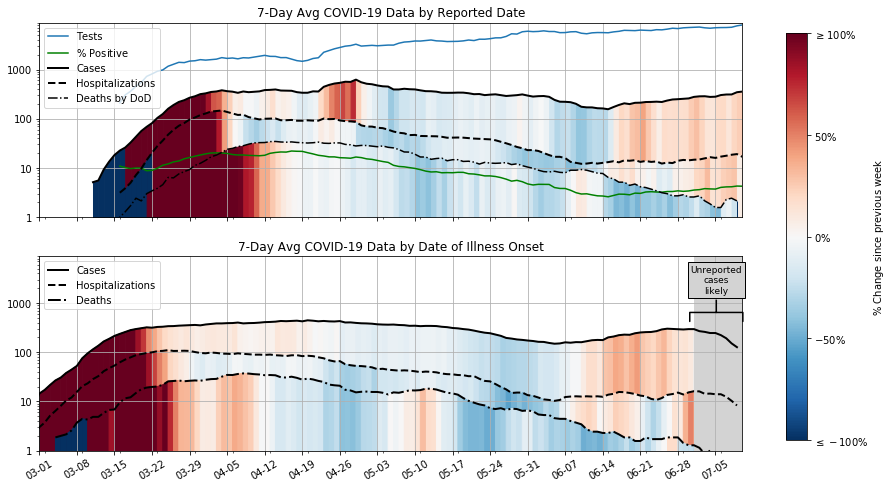

In [4]:
plt.rcParams['figure.figsize'] = [40/2.54, 20/2.54]
fig, axs = plt.subplots(nrows=2, ncols=1,facecolor='white')
dates=COVID.reset_index()['index'].values
cmap = mpl.cm.RdBu.reversed()
normalize = mpl.colors.Normalize(vmin=-100, vmax=100)
N=len(COVID)
formatter = mdates.DateFormatter("%m-%d")
locator=mdates.WeekdayLocator(byweekday=WE)

######## By Date Reported ###########
COVID.plot(y="7DayTests",label='Tests',ax=axs[0])
COVID.plot(y="7DayPPos",label='$\%$ Positive',color='green',ax=axs[0])

#Plot 7-day avg line
COVID.plot(y="7DayReport",linewidth=2,color='k',ax=axs[0],label='Cases')
for i in range(0,N):
    axs[0].fill_between(x=dates[i-1:i+1],y1=COVID["7DayReport"][i-1:i+1],y2=1, color=cmap(normalize(COVID["change in 7 day reported"][i])))
COVID.plot(y='7DayHosp',ax=axs[0],style='--',color='k',linewidth=2,label='Hospitalizations')
for i in range(0,N):
    axs[0].fill_between(x=dates[i-1:i+1],y1=COVID["7DayHosp"][i-1:i+1],y2=1, color=cmap(normalize(COVID["change in 7 day Hosp"][i])))
COVID.plot(y='7DayDeaths',ax=axs[0],style='-.',color='black',label='Deaths by DoD')
for i in range(0,N):
    axs[0].fill_between(x=dates[i-1:i+1],y1=COVID["7DayDeaths"][i-1:i+1],y2=1, color=cmap(normalize(COVID["change in 7 day Deaths"][i])))

###### Plots by onset date
COVID.plot(y="7DayOnset",linewidth=2,label='Cases',color='k',ax=axs[1])
for i in range(0,N):
    axs[1].fill_between(x=dates[i-1:i+1],y1=COVID["7DayOnset"][i-1:i+1],y2=0, color=cmap(normalize(COVID["change in 7 day onset"][i])))
COVID.plot(y='7DayHospOnset',ax=axs[1],style='--',color='k',linewidth=2,label='Hospitalizations')
for i in range(0,N):
    axs[1].fill_between(x=dates[i-1:i+1],y1=COVID["7DayHospOnset"][i-1:i+1],y2=0, color=cmap(normalize(COVID["change in 7 day Hosp Onset"][i])))
COVID.plot(y='7DayDeathsOnset',ax=axs[1],style='-.',color='k',linewidth=2,label='Deaths')
for i in range(0,N):
    axs[1].fill_between(x=dates[i-1:i+1],y1=COVID["7DayDeathsOnset"][i-1:i+1],y2=0, color=cmap(normalize(COVID["change in 7 day Deaths Onset"][i])))

axs[1].fill_between(x=dates[N-10:N],y1=9000,y2=0, color="lightgray")    


for i in range (0,2):
    axs[i].set(xlabel='',ylabel='',xlim=[datetime.date(2020, 3, 17), dates[N-1]],ylim=(1, 9000),yscale='log')
    axs[i].yaxis.set_major_formatter(ScalarFormatter())
    axs[i].set_xlim([datetime.date(2020, 3, 1), dates[N-1]])
    axs[i].xaxis.set_major_formatter(formatter)
    axs[i].xaxis.set_major_locator(locator)
    axs[i].tick_params(axis='x', labelrotation=30)
    axs[i].grid()
    axs[i].legend(loc='upper left')

    axs[0].set(xticklabels='')
#Show Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalize)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axs[:].ravel().tolist(), shrink=0.95)
cbar.set_ticks(np.arange(-100, 101,50))
cbar.set_ticklabels(['$\leq -100\%$', '$-50\%$', '$0\%$', '$50\%$','$\geq 100\%$'])
cbar.set_label('$\%$ Change since previous week')

axs[1].annotate('Unreported\ncases\nlikely', xy=(0.963, 0.70), xytext=(.963, .80), xycoords='axes fraction', 
            fontsize=9, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='lightgray'),
            arrowprops=dict(arrowstyle='-[, widthB=2.95, lengthB=1', lw=1.5,))

axs[0].title.set_text('7-Day Avg COVID-19 Data by Reported Date')
axs[1].title.set_text('7-Day Avg COVID-19 Data by Date of Illness Onset')

In [ ]:
dates=Covid.reset_index()['index'].values

In [ ]:
df.head(20)

In [ ]:
(datetime.datetime.now()-datetime.timedelta(days=0)).strftime("covid19_case_summary_%Y-%m-%d.csv")
